In [2]:
# Mount the google drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Import pandas, use pd as an alias
import pandas as pd

# Replace 'path/to/data.csv' with the path to your CSV file within your drive.
#df = pd.read_csv('/content/drive/MyDrive/IT Bootcamp/IT Data Bootcamp/Week 9 (Python)/wk10_pandas_learner/Resources/data.csv', index_col = 0)

# comment the line below to remove row numbers appear in your df.
df = pd.read_csv('/content/drive/MyDrive/IT Bootcamp/IT Data Bootcamp/Week 9 (Python)/wk10_pandas_learner/Resources/data.csv')


# Print the first 5 rows of the DataFrame
df.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [5]:
# Remove rows where the "Calories" column has NaN values
df_cleaned_1 = df.dropna(subset=['Calories'])

# Display the DataFrame after removing the rows
print(df_cleaned_1)


     Duration  Pulse  Maxpulse  Calories
0          60    110       130     409.1
1          60    117       145     479.0
2          60    103       135     340.0
3          45    109       175     282.4
4          45    117       148     406.0
..        ...    ...       ...       ...
164        60    105       140     290.8
165        60    110       145     300.0
166        60    115       145     310.2
167        75    120       150     320.4
168        75    125       150     330.4

[164 rows x 4 columns]


In [6]:
# Identify duplicate rows
duplicates = df_cleaned_1[df_cleaned_1.duplicated()]

# Display the duplicate rows
print(duplicates)


     Duration  Pulse  Maxpulse  Calories
36         60    102       127     300.0
37         60    100       120     300.0
38         60    100       120     300.0
40         45     90       112     180.1
71         60    109       153     387.6
113        45    100       120     225.3
155        60    111       151     368.5


In [7]:
# Remove duplicate rows, keeping the first occurrence
df_cleaned_2 = df_cleaned_1.drop_duplicates()

# Display the DataFrame after removing duplicates
print(df_cleaned_2)

     Duration  Pulse  Maxpulse  Calories
0          60    110       130     409.1
1          60    117       145     479.0
2          60    103       135     340.0
3          45    109       175     282.4
4          45    117       148     406.0
..        ...    ...       ...       ...
164        60    105       140     290.8
165        60    110       145     300.0
166        60    115       145     310.2
167        75    120       150     320.4
168        75    125       150     330.4

[157 rows x 4 columns]


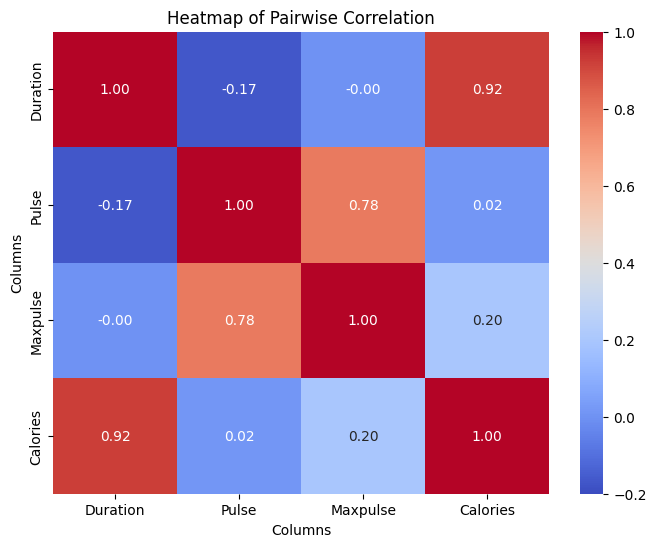

In [8]:
# Import seaborn
import seaborn as sns
import matplotlib.pyplot as plt  # This gives us specific tools for plotting.
# Printing a matrix of pairwise corelation of the relationships between columns
correlation_matrix = df_cleaned_2.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))  # Optional: Adjust the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",vmin=-0.2, vmax=1)

# Set title and labels
plt.title('Heatmap of Pairwise Correlation')
plt.xlabel('Columns')
plt.ylabel('Columns')

# Save the plot as a PNG file
plt.savefig('/content/drive/MyDrive/Portfolio/Python/Python Project - Fitness Tracking/Colab Notebooks/Heatmap of Pairwise Correlation.png', format='png')

# Display the heatmap
plt.show()

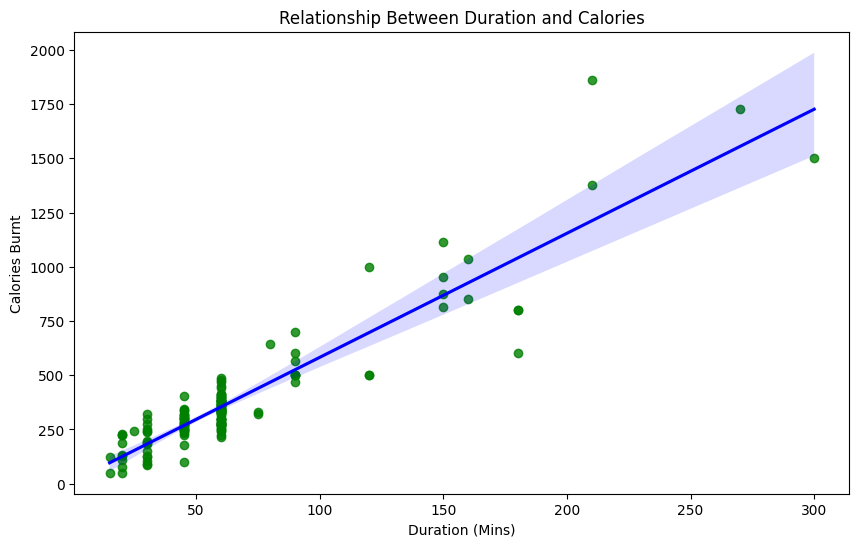

In [9]:
# 1. Gathering the tools for drawing and data:
import sys       # This helps with sending information out, like a messenger.
import matplotlib  # This is the main library for creating plots and charts.
matplotlib.use('Agg')  # This sets a drawing style that works in different environments.
# Bringing in .pyplot:

# 2. This command ensures that plots are rendered inline within the notebook.
%matplotlib inline

# 3. Create a scatter plot with a regression line using seaborn:
plt.figure(figsize=(10, 6))  # Optional: Adjust the size of the plot
sns.regplot(x='Duration', y='Calories', data=df_cleaned_2, scatter_kws={'color': 'Green'}, line_kws={'color': 'Blue'})

# 4. Customize and display the plot
plt.title('Relationship Between Duration and Calories')  # Add a title
plt.xlabel('Duration (Mins)')  # Label the x-axis
plt.ylabel('Calories Burnt')  # Label the y-axis

# Save the plot as a PNG file
plt.savefig('/content/drive/MyDrive/Portfolio/Python/Python Project - Fitness Tracking/Colab Notebooks/Relationship Between Duration and Calories.png', format='png')

plt.show()


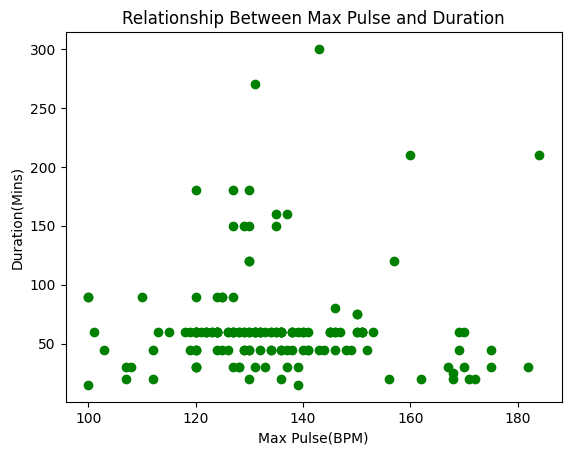

In [10]:
# Create a scatter plot:
# - Use 'Duration' as the x-axis - Use 'Pulse' as the y-axis
plt.scatter(df_cleaned_2['Maxpulse'], df_cleaned_2['Duration'], color='green')  # Change color to green

# Customise and display the plot
plt.title('Relationship Between Max Pulse and Duration')  # Add a title
plt.xlabel('Max Pulse(BPM)')  # Label the x-axis
plt.ylabel('Duration(Mins)')  # Label the y-axis

# Save the plot as a PNG file
plt.savefig('/content/drive/MyDrive/Portfolio/Python/Python Project - Fitness Tracking/Colab Notebooks/Scatter plot max pulse vs duration.png', format='png')

plt.show()

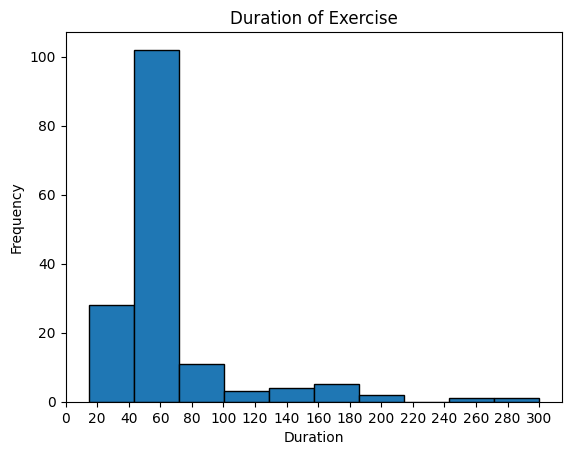

In [15]:
# Create a histogram of the "Duration" column:
df_cleaned_2["Duration"].plot(kind='hist', edgecolor='black')  # Create a histogram

# Customize the plot (optional):
plt.title('Duration of Exercise')  # Add a title
plt.xlabel('Duration')  # Label the x-axis
plt.ylabel('Frequency')  # Label the y-axis

# Set x-axis ticks to be every 20 units
plt.xticks(range(0, int(df_cleaned_2["Duration"].max()) + 20, 20))

# Save the plot as a PNG file
plt.savefig('/content/drive/MyDrive/Portfolio/Python/Python Project - Fitness Tracking/Colab Notebooks/Duration hist.png', format='png')

# Display the plot:
plt.show()

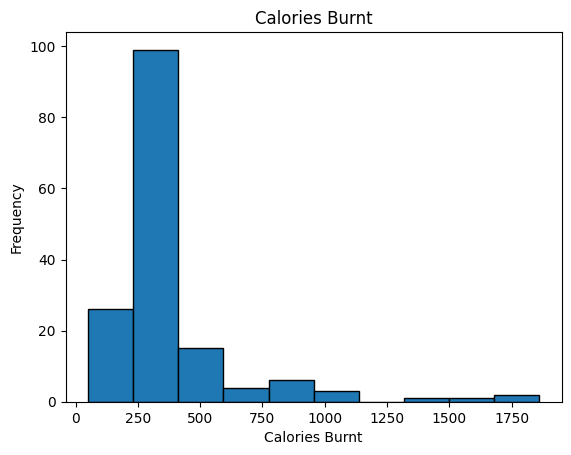

In [18]:
# Create a histogram of the "Duration" column:
df_cleaned_2["Calories"].plot(kind='hist', edgecolor='black')  # Create a histogram

# Customize the plot (optional):
plt.title('Calories Burnt')  # Add a title
plt.xlabel('Calories Burnt')  # Label the x-axis
plt.ylabel('Frequency')  # Label the y-axis

# Save the plot as a PNG file
plt.savefig('/content/drive/MyDrive/Portfolio/Python/Python Project - Fitness Tracking/Colab Notebooks/Calorie hist.png', format='png')

# Display the plot:
plt.show()

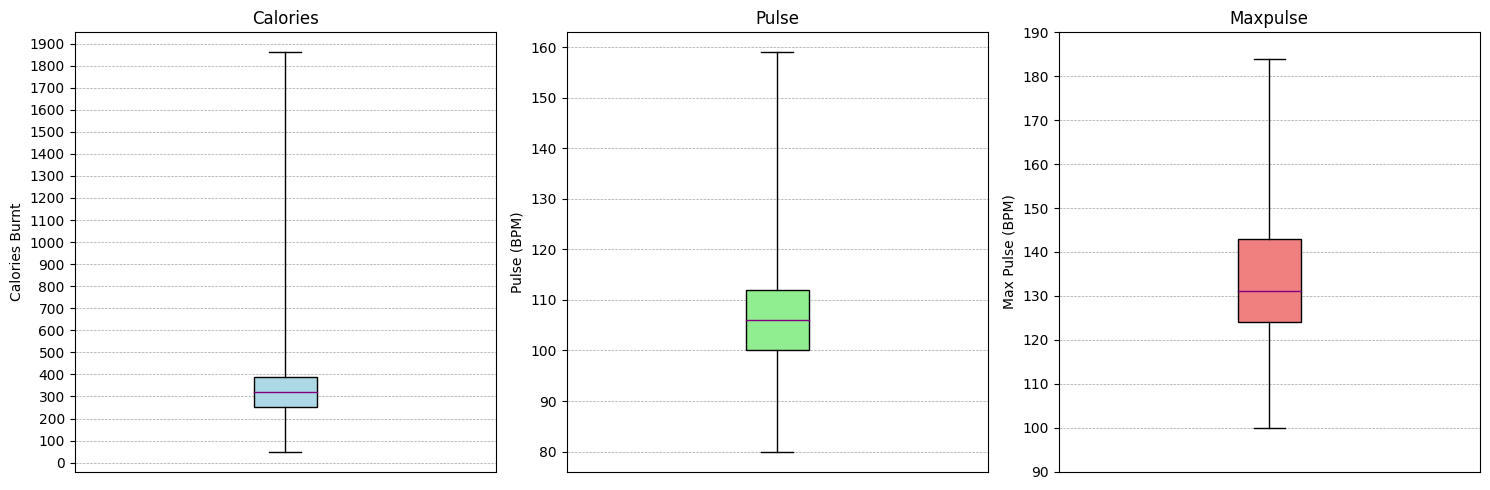

In [13]:
# Set up the figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Define colors for each boxplot
colors = ['lightblue', 'lightgreen', 'lightcoral']

# Define a contrasting color for the median line
median_color = 'purple'

# Define grid line style
grid_style = {'linestyle': '--', 'linewidth': 0.5, 'color': 'gray', 'alpha': 0.7}

# First boxplot for "Calories"
bp1 = axes[0].boxplot(df_cleaned_2['Calories'].dropna(), patch_artist=True, whis=[0, 100], medianprops={'color': median_color})
axes[0].set_title('Calories')
axes[0].set_ylabel('Calories Burnt')  # Custom y-axis label
axes[0].grid(**grid_style)  # Add faint grid lines to the first plot
axes[0].set_yticks(range(0, int(df_cleaned_2['Calories'].max()) + 100, 100))  # Set y-axis ticks every 100

# Color the boxes
for patch in bp1['boxes']:
    patch.set_facecolor(colors[0])  # Set the color for the first boxplot

# Remove x-axis labels
axes[0].set_xticks([])  # Remove x-axis ticks

# Second boxplot for "Pulse"
bp2 = axes[1].boxplot(df_cleaned_2['Pulse'].dropna(), patch_artist=True, whis=[0, 100], medianprops={'color': median_color})
axes[1].set_title('Pulse')
axes[1].set_ylabel('Pulse (BPM)')  # Custom y-axis label
axes[1].grid(**grid_style)  # Add faint grid lines to the second plot

# Color the boxes
for patch in bp2['boxes']:
    patch.set_facecolor(colors[1])  # Set the color for the second boxplot

# Remove x-axis labels
axes[1].set_xticks([])  # Remove x-axis ticks

# Third boxplot for "Maxpulse"
bp3 = axes[2].boxplot(df_cleaned_2['Maxpulse'].dropna(), patch_artist=True, whis=[0, 100], medianprops={'color': median_color})
axes[2].set_title('Maxpulse')
axes[2].set_ylabel('Max Pulse (BPM)')  # Custom y-axis label
axes[2].grid(**grid_style)  # Add faint grid lines to the third plot
axes[2].set_yticks(range(90, int(df_cleaned_2['Maxpulse'].max()) + 10, 10))  # Set y-axis ticks every 10 starting at 90

# Color the boxes
for patch in bp3['boxes']:
    patch.set_facecolor(colors[2])  # Set the color for the third boxplot

# Remove x-axis labels
axes[2].set_xticks([])  # Remove x-axis ticks

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('/content/drive/MyDrive/Portfolio/Python/Python Project - Fitness Tracking/Colab Notebooks/Calories, Pulse and Max Pulse B and W Plot.png', format='png')

# Display the plots
plt.show()
